<a href="https://colab.research.google.com/github/MILLERASPRILLA/Proyecto--Churn-/blob/main/Modelos/Regresi%C3%B3n_Logisitca_Tesis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![Universidad Central](https://www.ucentral.edu.co/sites/default/files/inline-images/identificadores-Centrados_en_ti_logo-h.png)

# __PROYECTO DE GRADO__

> ## ____ Implementación de modelos de aprendizaje de máquina para la prevención de la fuga de clientes en una empresa de telecomunicaciones.
>
>
> <br>
>
> ## __Contenido__

>**Tema:**

>> Regresión Logistica 

$$\ln \left(\frac{p_i}{1-p_i} \right)=\beta_0 +\beta_1X_1+\beta_2X_2+...+\beta_pX_p  $$ 
donde $p=P(Y=1)$

>---

- Librerias

In [ ]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import linear_model, tree
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, classification_report
from sklearn.feature_selection import RFE
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import OneHotEncoder
from sklearn import preprocessing
from sklearn.metrics import class_likelihood_ratios
from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import cross_val_score
from imblearn.under_sampling import RandomUnderSampler

# EXTRACCIÓN DE LOS DATOS 

In [ ]:
DF = pd.read_csv("https://raw.githubusercontent.com/MILLERASPRILLA/Proyecto--Churn-/main/Bases/Data_limpia%20(2).csv", sep= ",", encoding= "latin1")
DF.shape

(7043, 20)

In [ ]:
DF.set_index("ID_CLIENTE", inplace = True)
DF.head()

,GENERO,ADULTO_MAYOR,CASADO,PERSONAS_A_CARGO,MESES_COMO_CLIENTE,TIENE_TELEFONIA,VARIAS_LINEAS,TIPO_INTERNET,SEGURIDAD_EN_LINEA,COPIA_DE_SEGURIDAD,PROTECCION_DISPOSITIVO,SOPORTE_TECNICO,SERVICIO_TV,SERVICIOS_STREAMING,PERIODO_CONTRATO,FACTURACION_ELECTRONICA,METODO_PAGO,COBRO_MENSUAL,ABANDONO
ID_CLIENTE,,,,,,,,,,,,,,,,,,,
7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,No
5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,No
3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,Yes
7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,No
9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,Yes


# PREPROCESAMIENTO

## EXPLORACIÓN

In [ ]:
# Exploracion de las variables. 
DF.info() 

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   GENERO                   7043 non-null   object 
 1   ADULTO_MAYOR             7043 non-null   int64  
 2   CASADO                   7043 non-null   object 
 3   PERSONAS_A_CARGO         7043 non-null   object 
 4   MESES_COMO_CLIENTE       7043 non-null   int64  
 5   TIENE_TELEFONIA          7043 non-null   object 
 6   VARIAS_LINEAS            7043 non-null   object 
 7   TIPO_INTERNET            7043 non-null   object 
 8   SEGURIDAD_EN_LINEA       7043 non-null   object 
 9   COPIA_DE_SEGURIDAD       7043 non-null   object 
 10  PROTECCION_DISPOSITIVO   7043 non-null   object 
 11  SOPORTE_TECNICO          7043 non-null   object 
 12  SERVICIO_TV              7043 non-null   object 
 13  SERVICIOS_STREAMING      7043 non-null   object 
 14  PERIODO_CONTRA

>> A pesar que en la limpieza de datos habíamos transformado las variables tipo objeto a tipo category, al cargar la base de datos Python las reconoce como objeto, por lo cual, reemplazaremos nuevamente el tipo de dato. 

In [ ]:
# Convertir columnas en categorias
columnasConvertir = ['GENERO', 'ADULTO_MAYOR', 'CASADO', 'PERSONAS_A_CARGO', 'TIENE_TELEFONIA', 
               'VARIAS_LINEAS', 'TIPO_INTERNET', 'SEGURIDAD_EN_LINEA', 'COPIA_DE_SEGURIDAD', 
               'PROTECCION_DISPOSITIVO', 'SOPORTE_TECNICO', 'SERVICIO_TV', 'SERVICIOS_STREAMING', 
               'PERIODO_CONTRATO', 'FACTURACION_ELECTRONICA', 'METODO_PAGO', 'ABANDONO']
              
DF[columnasConvertir] = DF[columnasConvertir].astype("category")

In [ ]:
# Reporte de cambios
DF.dtypes

GENERO                     category
ADULTO_MAYOR               category
CASADO                     category
PERSONAS_A_CARGO           category
MESES_COMO_CLIENTE            int64
TIENE_TELEFONIA            category
VARIAS_LINEAS              category
TIPO_INTERNET              category
SEGURIDAD_EN_LINEA         category
COPIA_DE_SEGURIDAD         category
PROTECCION_DISPOSITIVO     category
SOPORTE_TECNICO            category
SERVICIO_TV                category
SERVICIOS_STREAMING        category
PERIODO_CONTRATO           category
FACTURACION_ELECTRONICA    category
METODO_PAGO                category
COBRO_MENSUAL               float64
ABANDONO                   category
dtype: object

## ONE CODE

>> Toda vez que el modelo no recibe datos categóricos , codificaremos las variables categoricas en variables tipo one code

In [ ]:
# Codificacion variables categoricas
DF_dummie = DF.select_dtypes(exclude=np.number)
DF_dummie = pd.get_dummies(DF_dummie, drop_first = True)
DF_dummie.head()

,GENERO_Male,ADULTO_MAYOR_1,CASADO_Yes,PERSONAS_A_CARGO_Yes,TIENE_TELEFONIA_Yes,VARIAS_LINEAS_No phone service,VARIAS_LINEAS_Yes,TIPO_INTERNET_Fiber optic,TIPO_INTERNET_No,SEGURIDAD_EN_LINEA_No internet service,...,SERVICIO_TV_Yes,SERVICIOS_STREAMING_No internet service,SERVICIOS_STREAMING_Yes,PERIODO_CONTRATO_One year,PERIODO_CONTRATO_Two year,FACTURACION_ELECTRONICA_Yes,METODO_PAGO_Credit card (automatic),METODO_PAGO_Electronic check,METODO_PAGO_Mailed check,ABANDONO_Yes
ID_CLIENTE,,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,0,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
5575-GNVDE,1,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
3668-QPYBK,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,1
7795-CFOCW,1,0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
9237-HQITU,0,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,1,0,1,0,1


## Escalamiento de datos

>> Toda vez que los datos cuantitativos en la base tienen escalas y unidades de medida diferentes consideramos necesario homogenizar estos datos para evitar introducir sesgos al modelo. 

>> Para esto homogenizaremos las variables usando la técnica de Robust Scaler que nos permitirá no solo ajustar nuestros datos a una distribución normal, si no que nos evitara que los datos atípicos sesguen los resultados de nuestro modelo.  

>> Tecnica Robust Scales -> Escala características utilizando estadísticas que son robustas a los valores atípicos. 
Este Escalador elimina la mediana y escala los datos según el rango cuantílico (por defecto IQR: Interquartile Range). El IQR es el rango entre el 1er cuartil (cuantil 25) y el 3er cuartil (cuantil 75). 
El centrado y el escalado se realizan de forma independiente en cada característica calculando los estadísticos relevantes en las muestras del conjunto de entrenamiento. A continuación, la mediana y el rango intercuartílico se almacenan para utilizarlos en datos posteriores mediante el método de transformación. 
La normalización de un conjunto de datos es un requisito común para muchos estimadores de aprendizaje automático. Normalmente, esto se hace eliminando la media y escalando a la varianza unitaria. Sin embargo, los valores atípicos pueden influir negativamente en la media/varianza de la muestra. En estos casos, la mediana y el rango intercuartílico suelen dar mejores resultados. 
[Info](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.RobustScaler.html)

In [ ]:
# Obtener variables numericas en otro data frame
DF_num = DF.select_dtypes(include=np.number)
# Estandarizar los datos numericos
datosEstandarizados = preprocessing.RobustScaler().fit_transform(DF_num)
# Crear dataframa con los datos estandarizados 
DF_num = pd.DataFrame(datosEstandarizados, columns = DF_num.columns, index = DF_num.index)
DF_num.head()

,MESES_COMO_CLIENTE,COBRO_MENSUAL
ID_CLIENTE,,
7590-VHVEG,-0.608696,-0.745170
5575-GNVDE,0.108696,-0.246550
3668-QPYBK,-0.586957,-0.303588
7795-CFOCW,0.347826,-0.516099
9237-HQITU,-0.586957,0.006440


## BASE FINAL

In [ ]:
# concatenar los dataframe
DF_modelo =  pd.concat([DF_dummie, DF_num], axis=1)
DF_modelo.head() 

,GENERO_Male,ADULTO_MAYOR_1,CASADO_Yes,PERSONAS_A_CARGO_Yes,TIENE_TELEFONIA_Yes,VARIAS_LINEAS_No phone service,VARIAS_LINEAS_Yes,TIPO_INTERNET_Fiber optic,TIPO_INTERNET_No,SEGURIDAD_EN_LINEA_No internet service,...,SERVICIOS_STREAMING_Yes,PERIODO_CONTRATO_One year,PERIODO_CONTRATO_Two year,FACTURACION_ELECTRONICA_Yes,METODO_PAGO_Credit card (automatic),METODO_PAGO_Electronic check,METODO_PAGO_Mailed check,ABANDONO_Yes,MESES_COMO_CLIENTE,COBRO_MENSUAL
ID_CLIENTE,,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,0,0,1,0,0,1,0,0,0,0,...,0,0,0,1,0,1,0,0,-0.608696,-0.745170
5575-GNVDE,1,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0.108696,-0.246550
3668-QPYBK,1,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,1,1,-0.586957,-0.303588
7795-CFOCW,1,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0.347826,-0.516099
9237-HQITU,0,0,0,0,1,0,0,1,0,0,...,0,0,0,1,0,1,0,1,-0.586957,0.006440


In [ ]:
DF_modelo.shape

(7043, 30)

In [ ]:
DF_modelo.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 30 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   GENERO_Male                                 7043 non-null   uint8  
 1   ADULTO_MAYOR_1                              7043 non-null   uint8  
 2   CASADO_Yes                                  7043 non-null   uint8  
 3   PERSONAS_A_CARGO_Yes                        7043 non-null   uint8  
 4   TIENE_TELEFONIA_Yes                         7043 non-null   uint8  
 5   VARIAS_LINEAS_No phone service              7043 non-null   uint8  
 6   VARIAS_LINEAS_Yes                           7043 non-null   uint8  
 7   TIPO_INTERNET_Fiber optic                   7043 non-null   uint8  
 8   TIPO_INTERNET_No                            7043 non-null   uint8  
 9   SEGURIDAD_EN_LINEA_No internet service      7043 non-null   uint8  
 10  SE

In [ ]:
DF_modelo.to_csv("Data_dummie.csv")

In [ ]:
DF_modelo["MESES_COMO_CLIENTE"].info

<bound method Series.info of ID_CLIENTE
7590-VHVEG   -0.608696
5575-GNVDE    0.108696
3668-QPYBK   -0.586957
7795-CFOCW    0.347826
9237-HQITU   -0.586957
                ...   
6840-RESVB   -0.108696
2234-XADUH    0.934783
4801-JZAZL   -0.391304
8361-LTMKD   -0.543478
3186-AJIEK    0.804348
Name: MESES_COMO_CLIENTE, Length: 7043, dtype: float64>

In [ ]:
DF_modelo["MESES_COMO_CLIENTE"].min()

-0.6304347826086957

In [ ]:
DF_modelo["COBRO_MENSUAL"].describe()

count    7043.000000
mean       -0.102821
std         0.553635
min        -0.958602
25%        -0.641214
50%         0.000000
75%         0.358786
max         0.890524
Name: COBRO_MENSUAL, dtype: float64

# MODELADO

## MODELO 1

In [ ]:
# Partición de datos de entrenamiento y prueba 
Y=DF_modelo["ABANDONO_Yes"] ## Seleccionamos la variable objetivo (binaria)
X=DF_modelo.drop("ABANDONO_Yes", axis=1) ## Seleccionamos las variables explicativas
X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=123,test_size=0.3, stratify=Y) ## Dividimos en entrenamiento y prueba, y estratificando
##por la variable Y 
X_train.shape

(4930, 29)

In [ ]:
#   Entrenando al modelo
logreg=LogisticRegression() ### Llamo la regresión logistica
logreg.fit(X_train, y_train) ## Entreno el modelo

LogisticRegression()

### METRICAS MODELO  

In [ ]:
# prediccion del modelo 
y_pred_train=logreg.predict(X_train) ### Un umbral de 50%
y_pred_test=logreg.predict(X_test) ##  Un umbral de 50%

In [ ]:
cf = confusion_matrix(y_test, y_pred_test)

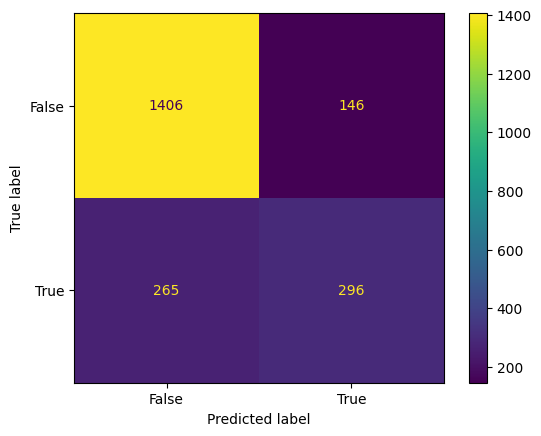

In [ ]:
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cf, display_labels = [False, True])
cm_display.plot()
plt.show()

In [ ]:
#  viendo sus metricas
print("En los datos de entrenamiento \n",classification_report(y_train, y_pred_train))
print("En los datos de prueba \n",classification_report(y_test, y_pred_test))

En los datos de entrenamiento 
               precision    recall  f1-score   support

           0       0.84      0.90      0.87      3622
           1       0.65      0.54      0.59      1308

    accuracy                           0.80      4930
   macro avg       0.75      0.72      0.73      4930
weighted avg       0.79      0.80      0.80      4930

En los datos de prueba 
               precision    recall  f1-score   support

           0       0.84      0.91      0.87      1552
           1       0.67      0.53      0.59       561

    accuracy                           0.81      2113
   macro avg       0.76      0.72      0.73      2113
weighted avg       0.80      0.81      0.80      2113



>> Observamos que el modelo planteado clasifica bien el 80% de los datos en la prueba, sin embargo, tiene importantes dificultades para clasificar las personas que se irán de la compañía efectivamente, Como podemos observar de los 561 clientes fugados que tienen los datos de prueba solo acertó en 296.

>> la precisión del modelo muestra que solo el 65% de las personas que el modelo indico se irían de la compañía se fueron efectivamente. Por su parte, tan solo el 53% de las personas que el modelo sugiere no se irían de la compaña efectivamente se quedaron. 

>>Cabe recordar que el objetivo de este trabajo es predecir correctamente los clientes que se fugen, por lo que el RCALL nos sugiere que el modelo esta siendo poco efectivo en este sentido. 


### AREA BAJO LA CURVA ROC

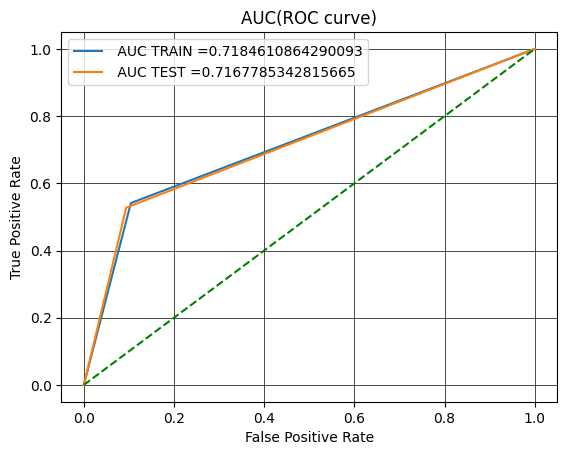

In [ ]:
train_fpr, train_tpr, tr_thresholds = roc_curve( y_train, y_pred_train)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_pred_test)

plt.grid()

plt.plot(train_fpr, train_tpr, label=" AUC TRAIN ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label=" AUC TEST ="+str(auc(test_fpr, test_tpr)))
plt.plot([0,1],[0,1],'g--')
plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("AUC(ROC curve)")
plt.grid(color='black', linestyle='-', linewidth=0.5)
plt.show()

## MODELO 2 -> HIPERPARAMETROS 

### AJUSTE DE HIPERPARAMETROS 

In [ ]:
# parametros a evaluar 
parameters = {
    'penalty' : ['l1','l2'], 
    'C': [0.001,0.01,0.1,1, 100, 1000],
    'solver'  : ['newton-cg', 'lbfgs', 'liblinear'],
}

In [ ]:
# asignacion de parametros a la grid
logreg = LogisticRegression() 
clf = GridSearchCV(logreg, # modelo 
                   param_grid = parameters, # hiperparámetros 
                   scoring="recall", # métrica para puntuación 
                   cv=10) # número de pliegues

>> A partir de la técnica de validación cruzada buscaremos la mejor forma de ajustar los parámetros de nuestro modelo, le daremos prioridad a encontrar el mejor recall toda vez que nuestra prioridad es detectar a los clientes churn. 

In [ ]:
# validacion cruzada 
clf.fit(X_train, y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
120 fits failed out of a total of 360.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
60 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py", line 54, in _check_solver
    raise ValueError(
ValueError: Solver 

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 100, 1000],
                         'penalty': ['l1', 'l2'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear']},
             scoring='recall')

In [ ]:
# seleccion de mejores parametros 
clf.best_estimator_
clf.best_params_

{'C': 100, 'penalty': 'l1', 'solver': 'liblinear'}

### MODELO  

In [ ]:
logreg = LogisticRegression(C = 100, 
                            penalty = 'l2', 
                            solver = 'newton-cg')

In [ ]:
logreg.fit(X_train, y_train)

LogisticRegression(C=100, solver='newton-cg')

In [ ]:
# betas del modelo con conste de 100 
pd.DataFrame(np.transpose(logreg.coef_), index=X_train.columns, columns=["betas"]).sort_values(by="betas") 

,betas
COBRO_MENSUAL,-1.905494
MESES_COMO_CLIENTE,-1.516131
PERIODO_CONTRATO_Two year,-1.391358
PERIODO_CONTRATO_One year,-0.654786
SERVICIOS_STREAMING_No internet service,-0.242881
SERVICIO_TV_No internet service,-0.242881
TIPO_INTERNET_No,-0.242881
SEGURIDAD_EN_LINEA_No internet service,-0.242881
COPIA_DE_SEGURIDAD_No internet service,-0.242881
SOPORTE_TECNICO_No internet service,-0.242881


### METRICAS MODELO 

In [ ]:
# prediccion del modelo 
y_pred_train=logreg.predict(X_train) ### Un umbral de 50%
y_pred_test=logreg.predict(X_test) ##  Un umbral de 50%

In [ ]:
cf1 = confusion_matrix(y_test, y_pred_test)

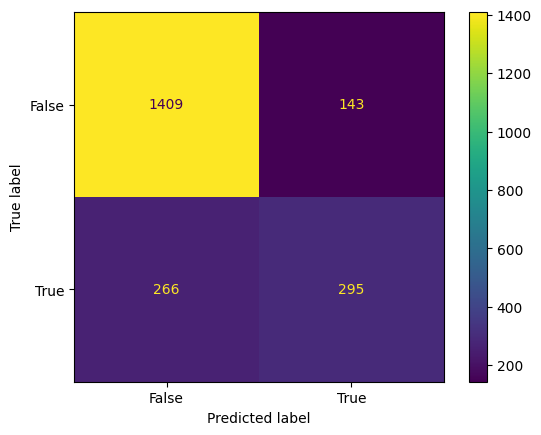

In [ ]:
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cf1, display_labels = [False, True])
cm_display.plot()
plt.show()

In [ ]:
#  viendo sus metricas
print("En los datos de entrenamiento \n",classification_report(y_train, y_pred_train))
print("En los datos de prueba \n",classification_report(y_test, y_pred_test))

En los datos de entrenamiento 
               precision    recall  f1-score   support

           0       0.84      0.90      0.87      3622
           1       0.65      0.54      0.59      1308

    accuracy                           0.80      4930
   macro avg       0.75      0.72      0.73      4930
weighted avg       0.79      0.80      0.80      4930

En los datos de prueba 
               precision    recall  f1-score   support

           0       0.84      0.91      0.87      1552
           1       0.67      0.53      0.59       561

    accuracy                           0.81      2113
   macro avg       0.76      0.72      0.73      2113
weighted avg       0.80      0.81      0.80      2113



### AREA BAJO LA CURVA ROC

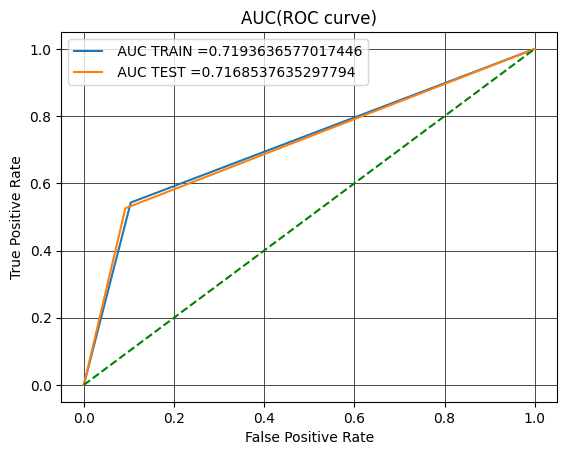

In [ ]:
train_fpr, train_tpr, tr_thresholds = roc_curve( y_train, y_pred_train)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_pred_test)

plt.grid()

plt.plot(train_fpr, train_tpr, label=" AUC TRAIN ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label=" AUC TEST ="+str(auc(test_fpr, test_tpr)))
plt.plot([0,1],[0,1],'g--')
plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("AUC(ROC curve)")
plt.grid(color='black', linestyle='-', linewidth=0.5)
plt.show()

### SELECCION DEL MEJOR THRESHOLD

In [ ]:
paraumbral=pd.DataFrame(np.transpose(np.round(roc_curve(y_train, logreg.predict_proba(X_train)[:,1]),4)), 
                        columns=["FPR", "TPR", "Umbral"])
## Distancia euclidiana al punto ideal
paraumbral["distancia"]=np.sqrt(paraumbral["FPR"]**2+(1-paraumbral["TPR"])**2)
paraumbral.sort_values(by="distancia")

,FPR,TPR,Umbral,distancia
883,0.2584,0.7989,0.2678,0.327432
881,0.2579,0.7974,0.2689,0.327962
879,0.2573,0.7966,0.2699,0.327986
877,0.2557,0.7943,0.2719,0.328169
882,0.2584,0.7974,0.2683,0.328355
...,...,...,...,...
2,0.0000,0.0176,0.8236,0.982400
3,0.0006,0.0176,0.8234,0.982400
1,0.0000,0.0008,0.8752,0.999200
0,0.0000,0.0000,1.8752,1.000000


### MODELO CON THRESHOLD OPTIMIZADO

In [ ]:
# Modelo con Threshold optimizado
thres=0.2678
y_pred_train=np.where(logreg.predict_proba(X_train)[:,1] > thres, 1, 0)
y_pred_test=np.where(logreg.predict_proba(X_test)[:,1] > thres, 1, 0)

### METRICAS MODELO OPTIMIZADO

In [ ]:
cm2 = confusion_matrix(y_test, y_pred_test)

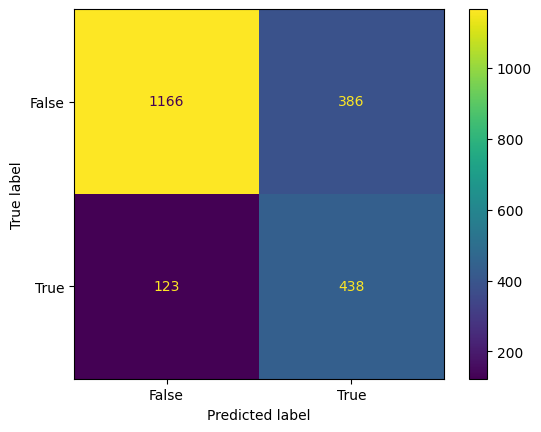

In [ ]:
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm2, display_labels = [False, True])
cm_display.plot()
plt.show()

In [ ]:
print("En los datos de entrenamiento \n",classification_report(pd.get_dummies(y_train)[1], y_pred_train))
print("En los datos de prueba \n",classification_report(pd.get_dummies(y_test)[1], y_pred_test))

En los datos de entrenamiento 
               precision    recall  f1-score   support

           0       0.91      0.74      0.82      3622
           1       0.53      0.80      0.64      1308

    accuracy                           0.76      4930
   macro avg       0.72      0.77      0.73      4930
weighted avg       0.81      0.76      0.77      4930

En los datos de prueba 
               precision    recall  f1-score   support

           0       0.90      0.75      0.82      1552
           1       0.53      0.78      0.63       561

    accuracy                           0.76      2113
   macro avg       0.72      0.77      0.73      2113
weighted avg       0.81      0.76      0.77      2113



>> Con el ajuste del umbral nuestro modelo obtuvo una disminución de 0,5 en el accurracy sin embargo, el rcall para los clientes churn mejoro sustancialmente pasando de un 0,53 a un 0,78. De los 561 clientes churn que hay en los datos de prueba detecto correctamente a 439 fugados.  

>> La precisión para los churn se ve castigada en un 14% esto implica que aunque el modelo está clasificando correctamente a más personas como churn también le está dando una predicción incorrecta a más individuos, lo que podría ocasionar costos innecesarios para la compañía .  

### AREA BAJO LA CURVA ROC MODELO OPTIMIZADO

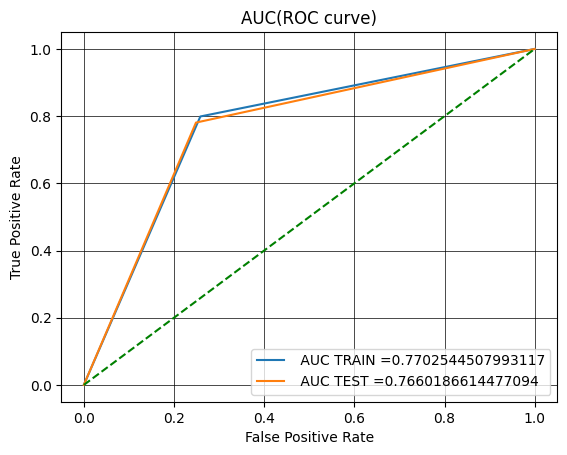

In [ ]:
train_fpr, train_tpr, tr_thresholds = roc_curve( y_train, y_pred_train)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_pred_test)

plt.grid()

plt.plot(train_fpr, train_tpr, label=" AUC TRAIN ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label=" AUC TEST ="+str(auc(test_fpr, test_tpr)))
plt.plot([0,1],[0,1],'g--')
plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("AUC(ROC curve)")
plt.grid(color='black', linestyle='-', linewidth=0.5)
plt.show()

## MODELO 3 -> BALANCEO DE DATOS 

### Balanceo de datos

In [ ]:
# Seleccionando los mejores parametros 
logreg=LogisticRegression(class_weight = {0 : 1, 1 : 2})
clf.fit(X_train, y_train)


In [ ]:
clf.best_estimator_
clf.best_params_

{'C': 1000, 'penalty': 'l1', 'solver': 'liblinear'}

In [ ]:
#   Entrenando al modelo
logreg=LogisticRegression(class_weight = {0 : 1, 1 : 2}, 
                          C = 1000, 
                            penalty = 'l1', 
                            solver = "liblinear") ### Llamo la regresión logistica
logreg.fit(X_train, y_train) ## Entreno el modelo

LogisticRegression(C=1000, class_weight={0: 1, 1: 2}, penalty='l1',
                   solver='liblinear')

In [ ]:
# prediccion del modelo 
y_pred_train=logreg.predict(X_train) ### Un umbral de 50%
y_pred_test=logreg.predict(X_test) ##  Un umbral de 50%

### METRICAS DEL MODELO

In [ ]:
cf2 = confusion_matrix(y_test, y_pred_test)

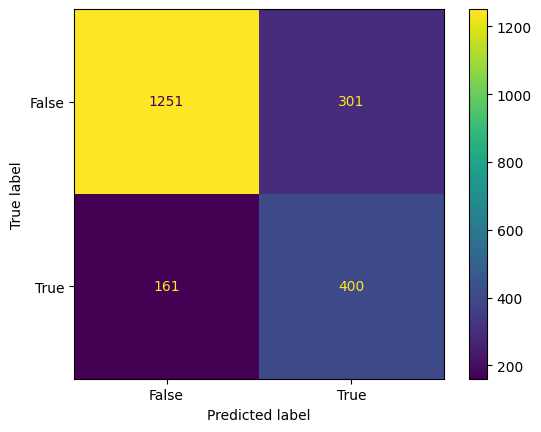

In [ ]:
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cf2, display_labels = [False, True])
cm_display.plot()
plt.show()

In [ ]:
#  viendo sus metricas
print("En los datos de entrenamiento \n",classification_report(y_train, y_pred_train))
print("En los datos de prueba \n",classification_report(y_test, y_pred_test))

En los datos de entrenamiento 
               precision    recall  f1-score   support

           0       0.89      0.80      0.84      3622
           1       0.56      0.72      0.63      1308

    accuracy                           0.78      4930
   macro avg       0.73      0.76      0.74      4930
weighted avg       0.80      0.78      0.78      4930

En los datos de prueba 
               precision    recall  f1-score   support

           0       0.89      0.81      0.84      1552
           1       0.57      0.71      0.63       561

    accuracy                           0.78      2113
   macro avg       0.73      0.76      0.74      2113
weighted avg       0.80      0.78      0.79      2113



>> El modelo balanceado muestra una tasa de falsos positivos más baja que el modelo anterior, sin embargo la precisión de los clientes churn sigue teniendo una porcentaje bajo de 0,57% lo que significa que el modelo sigue clasificando como fugados una cantidad importante de clientes que no consideran fugarse de la compañía. 

>> El modelo sigue clasificando mejor a los no fugados que a los fugados, el f1- score para esta categoría es de 0,84 % mientras que para los fugados es de 0,63% 

### AREA BAJO LA CURVA ROC

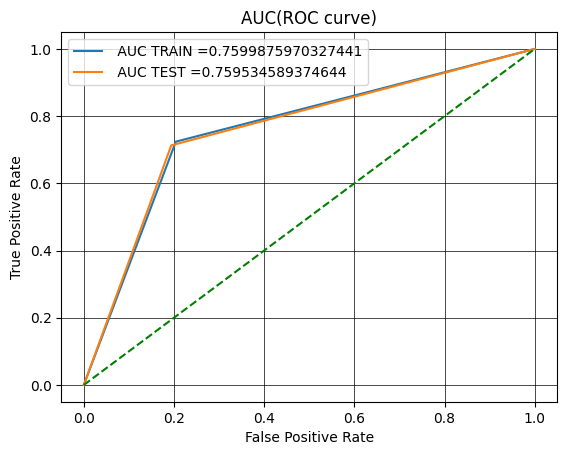

In [ ]:
train_fpr, train_tpr, tr_thresholds = roc_curve( y_train, y_pred_train)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_pred_test)

plt.grid()

plt.plot(train_fpr, train_tpr, label=" AUC TRAIN ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label=" AUC TEST ="+str(auc(test_fpr, test_tpr)))
plt.plot([0,1],[0,1],'g--')
plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("AUC(ROC curve)")
plt.grid(color='black', linestyle='-', linewidth=0.5)
plt.show()

### SELECCION DEL MEJOR THRESHOLD

In [ ]:
paraumbral=pd.DataFrame(np.transpose(np.round(roc_curve(y_train, logreg.predict_proba(X_train)[:,1]),4)), 
                        columns=["FPR", "TPR", "Umbral"])
## Distancia euclidiana al punto ideal
paraumbral["distancia"]=np.sqrt(paraumbral["FPR"]**2+(1-paraumbral["TPR"])**2)
paraumbral.sort_values(by="distancia")

,FPR,TPR,Umbral,distancia
873,0.2587,0.7966,0.4261,0.329085
867,0.2565,0.7936,0.4287,0.329231
863,0.2548,0.7913,0.4313,0.329361
865,0.2554,0.7920,0.4307,0.329383
859,0.2537,0.7898,0.4329,0.329466
...,...,...,...,...
2,0.0000,0.0153,0.9057,0.984700
3,0.0003,0.0153,0.9053,0.984700
1,0.0000,0.0008,0.9320,0.999200
0,0.0000,0.0000,1.9320,1.000000


### MODELO CON THRESHOLD OPTIMIZADO

In [ ]:
# Modelo con Threshold optimizado
thres=0.4261
y_pred_train=np.where(logreg.predict_proba(X_train)[:,1] > thres, 1, 0)
y_pred_test=np.where(logreg.predict_proba(X_test)[:,1] > thres, 1, 0)

### METRICAS MODELO OPTIMIZADO

In [ ]:
cm3 = confusion_matrix(y_test, y_pred_test)

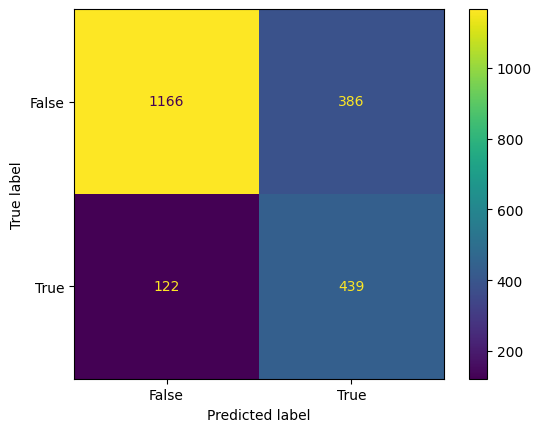

In [ ]:
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm3, display_labels = [False, True])
cm_display.plot()
plt.show()

In [ ]:
print("En los datos de entrenamiento \n",classification_report(pd.get_dummies(y_train)[1], y_pred_train))
print("En los datos de prueba \n",classification_report(pd.get_dummies(y_test)[1], y_pred_test))

En los datos de entrenamiento 
               precision    recall  f1-score   support

           0       0.91      0.74      0.82      3622
           1       0.53      0.80      0.63      1308

    accuracy                           0.76      4930
   macro avg       0.72      0.77      0.73      4930
weighted avg       0.81      0.76      0.77      4930

En los datos de prueba 
               precision    recall  f1-score   support

           0       0.91      0.75      0.82      1552
           1       0.53      0.78      0.63       561

    accuracy                           0.76      2113
   macro avg       0.72      0.77      0.73      2113
weighted avg       0.81      0.76      0.77      2113



>> Como observamos en la matrix de confusión el modelo tiene una leve mejoría respecto al modelo 2 con ajuste del punto de corte, sin embargo, sus métricas de rcall y precisión son iguales. 

### AREA BAJO LA CURVA MODELO OPTIMIZADO

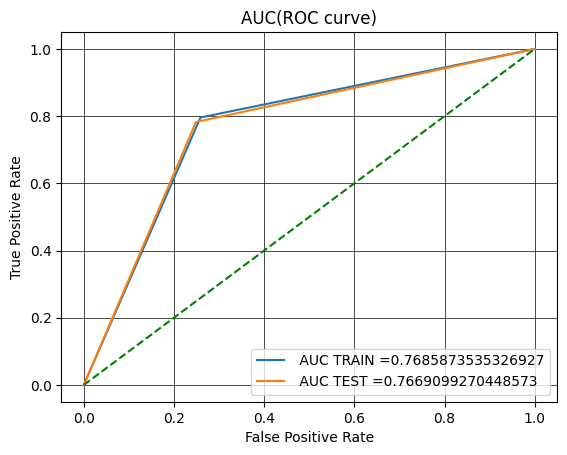

In [ ]:
train_fpr, train_tpr, tr_thresholds = roc_curve( y_train, y_pred_train)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_pred_test)

plt.grid()

plt.plot(train_fpr, train_tpr, label=" AUC TRAIN ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label=" AUC TEST ="+str(auc(test_fpr, test_tpr)))
plt.plot([0,1],[0,1],'g--')
plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("AUC(ROC curve)")
plt.grid(color='black', linestyle='-', linewidth=0.5)
plt.show()

In [ ]:
pd.DataFrame(np.transpose(logreg.coef_), index=X_train.columns, columns=["betas"]).sort_values(by="betas") 

,betas
COBRO_MENSUAL,-1.678571
MESES_COMO_CLIENTE,-1.469553
PERIODO_CONTRATO_Two year,-1.441724
SEGURIDAD_EN_LINEA_No internet service,-1.389829
VARIAS_LINEAS_No phone service,-1.206661
TIENE_TELEFONIA_Yes,-0.948907
PERIODO_CONTRATO_One year,-0.673662
SEGURIDAD_EN_LINEA_Yes,-0.240620
SOPORTE_TECNICO_Yes,-0.196368
PERSONAS_A_CARGO_Yes,-0.171762


In [ ]:
#original =  pd.read_csv("https://raw.githubusercontent.com/MILLERASPRILLA/Proyecto--Churn-/main/Bases/Base_original.csv", sep= ",", encoding= "latin1")
#original["PREDICCION"] = logreg.predict(X = X )
#original.shape

(7043, 22)

In [ ]:
original.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,PREDICCION
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,1
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,No,One year,No,Mailed check,56.95,1889.5,No,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,0
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1


In [ ]:
#DF_modelo["PREDICCION"] = logreg.predict(X = X)
#DF_modelo.shape

(7043, 31)

In [ ]:
DF_modelo

,GENERO_Male,ADULTO_MAYOR_1,CASADO_Yes,PERSONAS_A_CARGO_Yes,TIENE_TELEFONIA_Yes,VARIAS_LINEAS_No phone service,VARIAS_LINEAS_Yes,TIPO_INTERNET_Fiber optic,TIPO_INTERNET_No,SEGURIDAD_EN_LINEA_No internet service,...,PERIODO_CONTRATO_One year,PERIODO_CONTRATO_Two year,FACTURACION_ELECTRONICA_Yes,METODO_PAGO_Credit card (automatic),METODO_PAGO_Electronic check,METODO_PAGO_Mailed check,ABANDONO_Yes,MESES_COMO_CLIENTE,COBRO_MENSUAL,PREDICCION
ID_CLIENTE,,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,0,0,1,0,0,1,0,0,0,0,...,0,0,1,0,1,0,0,-0.608696,-0.745170,1
5575-GNVDE,1,0,0,0,1,0,0,0,0,0,...,1,0,0,0,0,1,0,0.108696,-0.246550,0
3668-QPYBK,1,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,1,1,-0.586957,-0.303588,0
7795-CFOCW,1,0,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0.347826,-0.516099,0
9237-HQITU,0,0,0,0,1,0,0,1,0,0,...,0,0,1,0,1,0,1,-0.586957,0.006440,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6840-RESVB,1,0,1,1,1,0,1,0,0,0,...,1,0,1,0,0,1,0,-0.108696,0.265869,0
2234-XADUH,0,0,1,1,1,0,1,1,0,0,...,1,0,1,1,0,0,0,0.934783,0.604416,0
4801-JZAZL,0,0,1,1,0,1,0,0,0,0,...,0,0,1,0,1,0,0,-0.391304,-0.749770,1


In [ ]:
#DF_modelo.to_csv("DUMMIE_PREDICCION.csv")

In [ ]:
#original.to_csv("ORIGINAL_PREDICCION.csv")

>> 



## MODELO 4 -> UNDERSAMPLING 

In [ ]:
# Partición de datos de entrenamiento y prueba 
Y=DF_modelo["ABANDONO_Yes"] ## Seleccionamos la variable objetivo (binaria)
X=DF_modelo.drop("ABANDONO_Yes", axis=1) ## Seleccionamos las variables explicativas
X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=123,test_size=0.3, stratify=Y) ## Dividimos en entrenamiento y prueba, y estratificando
##por la variable Y 
X_train.shape

(4930, 29)

In [ ]:
# Undersampling en los datos de entrenamiento
rus = RandomUnderSampler(random_state=42)
X_resampled, Y_resampled = rus.fit_resample(X_train, y_train)
X_resampled.shape

(2616, 29)

In [ ]:
#Seleccionando los mejores parametros 
logreg=LogisticRegression()
clf.fit(X_resampled, Y_resampled)


In [ ]:
# seleccion de mejores parametros 
clf.best_estimator_
clf.best_params_

{'C': 0.01, 'penalty': 'l1', 'solver': 'liblinear'}

In [ ]:
#   Entrenando al modelo
logreg=LogisticRegression(C = 0.01, 
                            penalty = 'l1', 
                            solver = 'liblinear') ### Llamo la regresión logistica
logreg.fit(X_resampled, Y_resampled) ## Entreno el modelo

LogisticRegression(C=0.01, penalty='l1', solver='liblinear')

In [ ]:
y_pred_train=logreg.predict(X_resampled) ### Un umbral de 50%
y_pred_test=logreg.predict(X_test) ##  Un umbral de 50%

### METRICAS DEL MODELO 

In [ ]:
cm12 = confusion_matrix(y_test, y_pred_test)

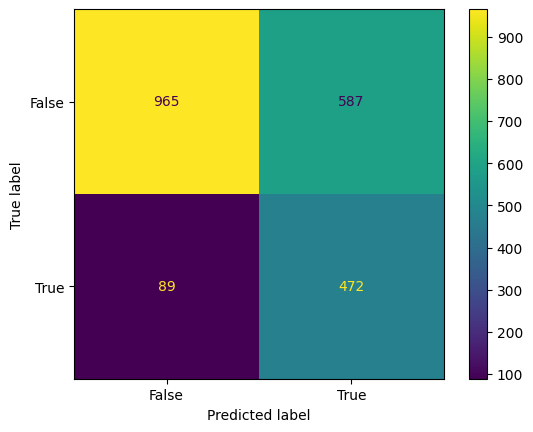

In [ ]:
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm12, display_labels = [False, True])
cm_display.plot()
plt.show()

In [ ]:
print("En los datos de entrenamiento \n",classification_report(Y_resampled, y_pred_train))
print("En los datos de prueba \n",classification_report(y_test, y_pred_test))

En los datos de entrenamiento 
               precision    recall  f1-score   support

           0       0.79      0.61      0.69      1308
           1       0.68      0.84      0.75      1308

    accuracy                           0.73      2616
   macro avg       0.74      0.73      0.72      2616
weighted avg       0.74      0.73      0.72      2616

En los datos de prueba 
               precision    recall  f1-score   support

           0       0.92      0.62      0.74      1552
           1       0.45      0.84      0.58       561

    accuracy                           0.68      2113
   macro avg       0.68      0.73      0.66      2113
weighted avg       0.79      0.68      0.70      2113



>> agregar 

### AREA BAJO LA CURVA ROC 

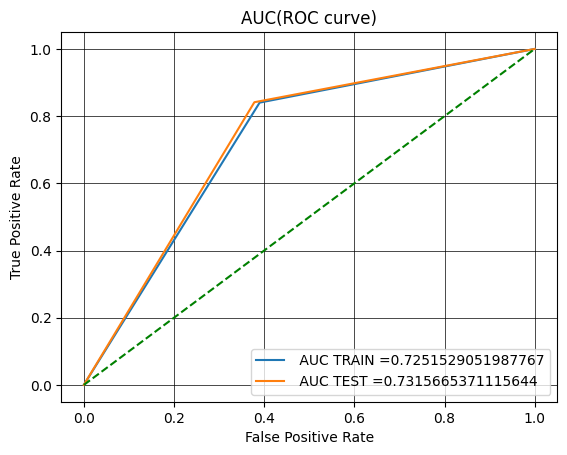

In [ ]:
train_fpr, train_tpr, tr_thresholds = roc_curve( Y_resampled, y_pred_train)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_pred_test)

plt.grid()

plt.plot(train_fpr, train_tpr, label=" AUC TRAIN ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label=" AUC TEST ="+str(auc(test_fpr, test_tpr)))
plt.plot([0,1],[0,1],'g--')
plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("AUC(ROC curve)")
plt.grid(color='black', linestyle='-', linewidth=0.5)
plt.show()

### SELECCION DEL MEJOR THRESHOLD 

In [ ]:
paraumbral=pd.DataFrame(np.transpose(np.round(roc_curve(Y_resampled, logreg.predict_proba(X_resampled)[:,1]),4)), 
                        columns=["FPR", "TPR", "Umbral"])
## Distancia euclidiana al punto ideal
paraumbral["distancia"]=np.sqrt(paraumbral["FPR"]**2+(1-paraumbral["TPR"])**2)
paraumbral.sort_values(by="distancia")

,FPR,TPR,Umbral,distancia
487,0.2416,0.7492,0.5511,0.348240
488,0.2431,0.7500,0.5510,0.348708
494,0.2477,0.7531,0.5507,0.349735
490,0.2454,0.7508,0.5508,0.349745
492,0.2462,0.7515,0.5507,0.349810
...,...,...,...,...
958,0.9954,1.0000,0.1588,0.995400
959,0.9969,1.0000,0.1570,0.996900
0,0.0000,0.0000,1.7614,1.000000
960,1.0000,1.0000,0.1555,1.000000


### METRICAS MODELO OPTIMIZADO 

In [ ]:
# Modelo con Threshold optimizado
thres=0.5511
y_pred_train=np.where(logreg.predict_proba(X_resampled)[:,1] > thres, 1, 0)
y_pred_test=np.where(logreg.predict_proba(X_test)[:,1] > thres, 1, 0)

In [ ]:
cm13 = confusion_matrix(y_test, y_pred_test)

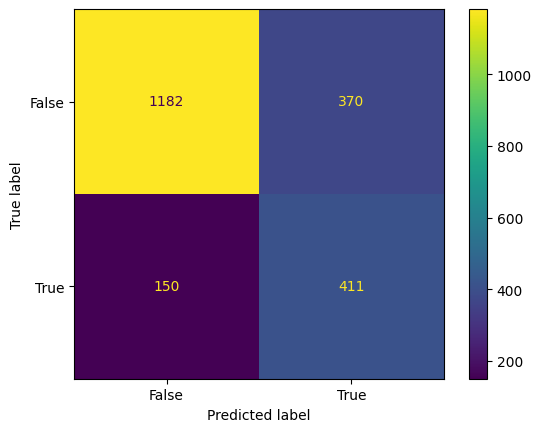

In [ ]:
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm13, display_labels = [False, True])
cm_display.plot()
plt.show()

In [ ]:
print("En los datos de entrenamiento \n",classification_report(Y_resampled, y_pred_train))
print("En los datos de prueba \n",classification_report(y_test, y_pred_test))

En los datos de entrenamiento 
               precision    recall  f1-score   support

           0       0.75      0.76      0.75      1308
           1       0.76      0.75      0.75      1308

    accuracy                           0.75      2616
   macro avg       0.75      0.75      0.75      2616
weighted avg       0.75      0.75      0.75      2616

En los datos de prueba 
               precision    recall  f1-score   support

           0       0.89      0.76      0.82      1552
           1       0.53      0.73      0.61       561

    accuracy                           0.75      2113
   macro avg       0.71      0.75      0.72      2113
weighted avg       0.79      0.75      0.76      2113



>> 



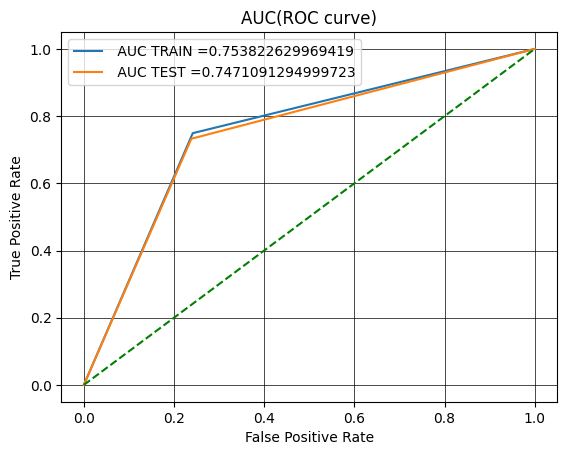

In [ ]:
train_fpr, train_tpr, tr_thresholds = roc_curve( Y_resampled, y_pred_train)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_pred_test)

plt.grid()

plt.plot(train_fpr, train_tpr, label=" AUC TRAIN ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label=" AUC TEST ="+str(auc(test_fpr, test_tpr)))
plt.plot([0,1],[0,1],'g--')
plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("AUC(ROC curve)")
plt.grid(color='black', linestyle='-', linewidth=0.5)
plt.show()

## MODELO 5 -> UNDERSAMPLING Y BALANCEO 

In [ ]:
# Partición de datos de entrenamiento y prueba 
Y=DF_modelo["ABANDONO_Yes"] ## Seleccionamos la variable objetivo (binaria)
X=DF_modelo.drop("ABANDONO_Yes", axis=1) ## Seleccionamos las variables explicativas
X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=123,test_size=0.3, stratify=Y) ## Dividimos en entrenamiento y prueba, y estratificando
##por la variable Y 
X_train.shape

(4930, 29)

In [ ]:
# Undersampling en los datos de entrenamiento
rus = RandomUnderSampler(random_state=42)
X_resampled, Y_resampled = rus.fit_resample(X_train,y_train)
X_resampled.shape

(2616, 29)

In [ ]:
# seleccion de mejores parametros 
clf.best_estimator_
clf.best_params_

{'C': 0.01, 'penalty': 'l1', 'solver': 'liblinear'}

In [ ]:
#   Entrenando al modelo
logreg=LogisticRegression(class_weight = {0 : 1, 1 : 2},
                          C = 0.01, 
                            penalty = 'l1', 
                            solver = 'liblinear') ### Llamo la regresión logistica
logreg.fit(X_resampled, Y_resampled) ## Entreno el modelo

LogisticRegression(C=0.01, class_weight={0: 1, 1: 2}, penalty='l1',
                   solver='liblinear')

In [ ]:
y_pred_train=logreg.predict(X_resampled) ### Un umbral de 50%
y_pred_test=logreg.predict(X_test) ##  Un umbral de 50%

### METRICAS DEL MODELO 

In [ ]:
cm13 = confusion_matrix(y_test, y_pred_test)

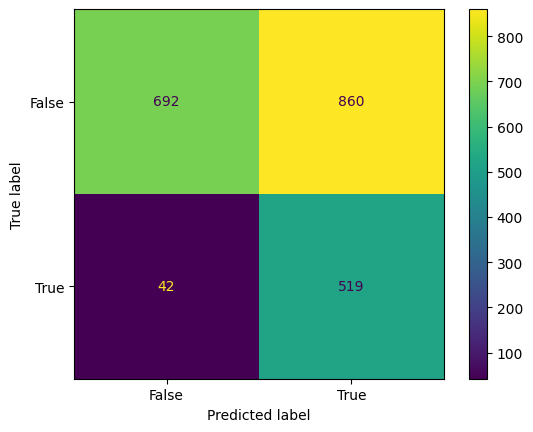

In [ ]:
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm13, display_labels = [False, True])
cm_display.plot()
plt.show()

In [ ]:
print("En los datos de entrenamiento \n",classification_report(Y_resampled, y_pred_train))
print("En los datos de prueba \n",classification_report(y_test, y_pred_test))

En los datos de entrenamiento 
               precision    recall  f1-score   support

           0       0.88      0.44      0.58      1308
           1       0.63      0.94      0.75      1308

    accuracy                           0.69      2616
   macro avg       0.75      0.69      0.67      2616
weighted avg       0.75      0.69      0.67      2616

En los datos de prueba 
               precision    recall  f1-score   support

           0       0.94      0.45      0.61      1552
           1       0.38      0.93      0.54       561

    accuracy                           0.57      2113
   macro avg       0.66      0.69      0.57      2113
weighted avg       0.79      0.57      0.59      2113



### AREA BAJO LA CURVA ROC 

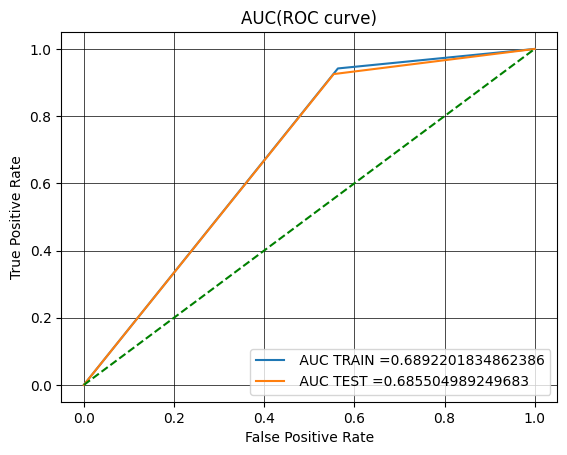

In [ ]:
train_fpr, train_tpr, tr_thresholds = roc_curve( Y_resampled, y_pred_train)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_pred_test)

plt.grid()

plt.plot(train_fpr, train_tpr, label=" AUC TRAIN ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label=" AUC TEST ="+str(auc(test_fpr, test_tpr)))
plt.plot([0,1],[0,1],'g--')
plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("AUC(ROC curve)")
plt.grid(color='black', linestyle='-', linewidth=0.5)
plt.show()

### SELECCION DEL MEJOR THRESHOLD 

In [ ]:
paraumbral=pd.DataFrame(np.transpose(np.round(roc_curve(Y_resampled, logreg.predict_proba(X_resampled)[:,1]),4)), 
                        columns=["FPR", "TPR", "Umbral"])
## Distancia euclidiana al punto ideal
paraumbral["distancia"]=np.sqrt(paraumbral["FPR"]**2+(1-paraumbral["TPR"])**2)
paraumbral.sort_values(by="distancia")

,FPR,TPR,Umbral,distancia
223,0.2492,0.7653,0.6493,0.342323
224,0.2531,0.7676,0.6485,0.343612
231,0.2791,0.7974,0.6466,0.344882
221,0.2408,0.7523,0.6521,0.345456
220,0.2378,0.7492,0.6530,0.345615
...,...,...,...,...
631,0.9839,1.0000,0.1876,0.983900
632,0.9901,1.0000,0.1871,0.990100
633,0.9931,1.0000,0.1840,0.993100
0,0.0000,0.0000,1.8793,1.000000


### METRICAS MODELO OPTIMIZADO 

In [ ]:
# Modelo con Threshold optimizado
thres=0.6493
y_pred_train=np.where(logreg.predict_proba(X_resampled)[:,1] > thres, 1, 0)
y_pred_test=np.where(logreg.predict_proba(X_test)[:,1] > thres, 1, 0)

In [ ]:
cm14 = confusion_matrix(y_test, y_pred_test)

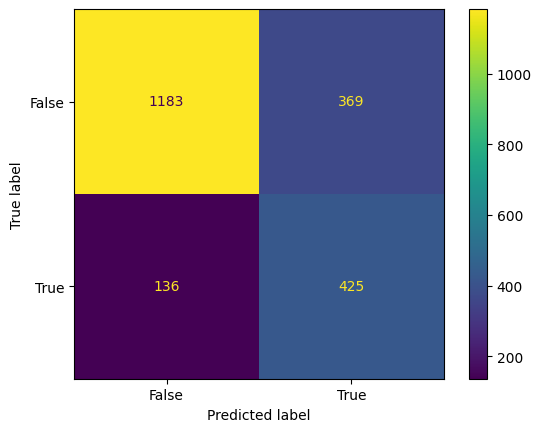

In [ ]:
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm14, display_labels = [False, True])
cm_display.plot()
plt.show()

In [ ]:
print("En los datos de entrenamiento \n",classification_report(Y_resampled, y_pred_train))
print("En los datos de prueba \n",classification_report(y_test, y_pred_test))

En los datos de entrenamiento 
               precision    recall  f1-score   support

           0       0.75      0.76      0.76      1308
           1       0.76      0.75      0.75      1308

    accuracy                           0.76      2616
   macro avg       0.76      0.76      0.76      2616
weighted avg       0.76      0.76      0.76      2616

En los datos de prueba 
               precision    recall  f1-score   support

           0       0.90      0.76      0.82      1552
           1       0.54      0.76      0.63       561

    accuracy                           0.76      2113
   macro avg       0.72      0.76      0.73      2113
weighted avg       0.80      0.76      0.77      2113



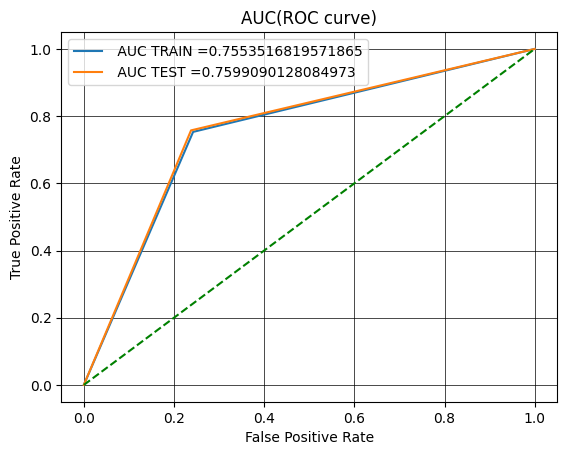

In [ ]:
train_fpr, train_tpr, tr_thresholds = roc_curve( Y_resampled, y_pred_train)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_pred_test)

plt.grid()

plt.plot(train_fpr, train_tpr, label=" AUC TRAIN ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label=" AUC TEST ="+str(auc(test_fpr, test_tpr)))
plt.plot([0,1],[0,1],'g--')
plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("AUC(ROC curve)")
plt.grid(color='black', linestyle='-', linewidth=0.5)
plt.show()

# Caracterización 